<h1>Extract data from EMODnet sources</h1>
<ol>
    <li>Aquaculture sites for finfish and shellfish farms</li>
    <li> Marine Protected areas</li>
    <li> Plastic monitoring</li>
</ol>

In [9]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
import geopandas as gpd
import cartopy.feature as cfeature
# import settings
import fiona
import pandas as pd
from shapely.geometry import Polygon
import xarray as xr

In [2]:
# filedir = '/storage/shared/oceanparcels/output_data/data_Darshika/SeaClearlyStuff/'
filedir = '../data/'

<h3> 1. Aquaculture sites</h3>

In [5]:
def get_dataset(file):
    return gpd.read_file(file)

In [6]:
    #bounding box for farms
top_lat, bottom_lat = 46, 30
left_lon, right_lon = -7, 37

In [5]:
def get_relevant_locations(locations):
    lat = []
    lon = []

    for i in range(len(locations)):
        if locations[i] is not None:
            lon.append(locations[i].x)
            lat.append(locations[i].y)

    lat = np.array(lat)
    lon = np.array(lon)
    # filter mediterranean region points only- get indexes first

    ids = np.where(np.logical_and(np.logical_and(lat >= bottom_lat, lat <= top_lat), np.logical_and(lon >= left_lon, lon <= right_lon)))[0]
    return lat[ids], lon[ids], ids

In [6]:
def get_dataframe(file, layer):
    gdf = gpd.read_file(file, layer=layer)
    return pd.DataFrame(gdf.values, columns=gdf.columns)

<h4>Shellfish data processing</h4> 
Data downloaded from EMODnet Human activities portal: 
<a href="https://www.emodnet-humanactivities.eu/search-results.php?dataname=Shellfish+Production">Link</a>

In [7]:
!ls /storage/shared/oceanparcels/output_data/data_Darshika/SeaClearlyStuff/

EMODnet_HA_Aquaculture_Marine_Finfish_20210913
EMODnet_HA_Aquaculture_Shellfish_20191126
EMODnet_HA_Environment_Natura2000_end2020_20210909


In [8]:
shellfish_file = filedir + "EMODnet_HA_Aquaculture_Shellfish_20191126/EMODnet_HA_Aquaculture_Shellfish_20191126.gdb"
sf_data = get_dataset(shellfish_file)
sf_lats,sf_lons, sf_index = get_relevant_locations(sf_data.geometry)
print(len(sf_index))

417


<h4>Finfish data processing</h4>
Data downloaded from EMODnet Human activities portal: 
<a href="https://www.emodnet-humanactivities.eu/search-results.php?dataname=Finfish+Production">Link</a>

In [9]:
finfish_file = filedir + "EMODnet_HA_Aquaculture_Marine_Finfish_20210913/EMODnet_HA_Aquaculture_Marine_Finfish_20210913.gdb"

layers = fiona.listlayers(finfish_file)

location_df = get_dataframe(finfish_file,layers[1])

ff_lats,ff_lons, ff_index = get_relevant_locations(location_df.geometry)
print(len(ff_index))

357


<h5>Plot both farm locations</h5> 

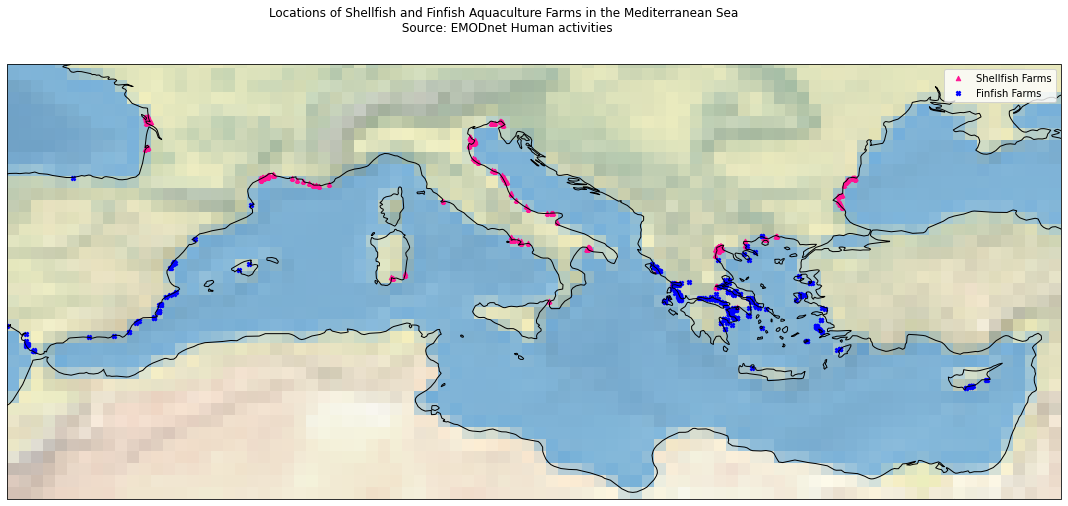

In [11]:
fig = plt.figure(figsize=(32,8))
Map_BOUNDS = [left_lon, right_lon, top_lat, bottom_lat]
plt.suptitle(
    "Locations of Shellfish and Finfish Aquaculture Farms in the Mediterranean Sea \n Source: EMODnet Human activities")
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()
ax.set_extent(Map_BOUNDS)

ax.scatter(sf_lons, sf_lats, s=20, c='deeppink', marker="^", label='Shellfish Farms')
ax.scatter(ff_lons, ff_lats, s=20, c='blue', marker='X', label='Finfish Farms')
plt.legend()
plt.show()

<h3>2. Marine Protected Areas</h3>
Data on Natura 2000 sites downloaded from EMODnet human-activities sites: <a href="https://www.emodnet-humanactivities.eu/search-results.php?dataname=Natura+2000">Link</a>

In [102]:
gdb_file = filedir + "EMODnet_HA_Environment_Natura2000_end2020_20210909/EMODnet_HA_Environment_Natura2000_end2020_20210909.gdb" #EMODnet_HA_Environment_Natura2000_end2020_20210909/

full_data = gpd.read_file(gdb_file, bbox=(left_lon, bottom_lat, right_lon, top_lat))
data = full_data[full_data.COAST_MAR == 1]
shapes = data.geometry

In [103]:
len(shapes)

104

In [ ]:
Polygon.contains()

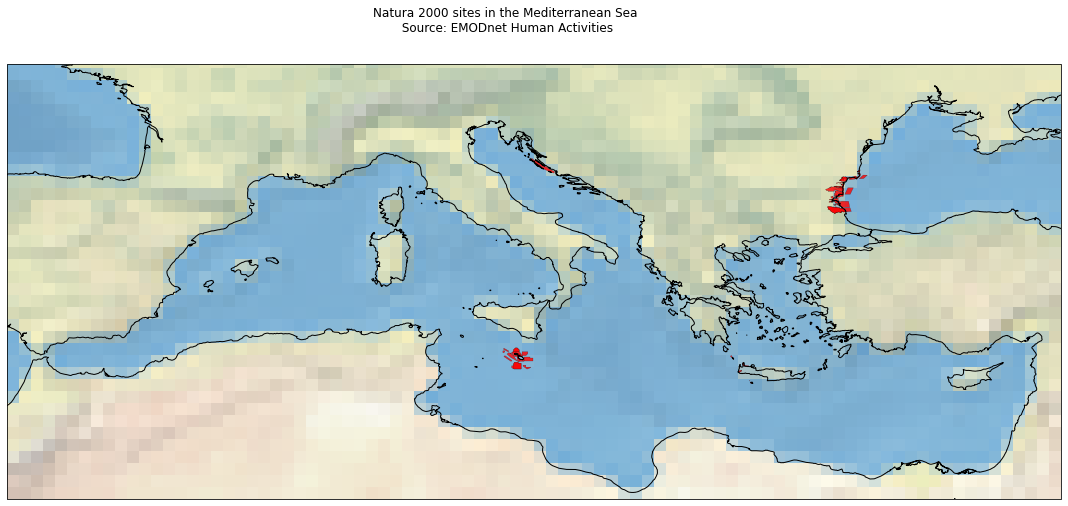

In [98]:
fig = plt.figure(figsize=(32,8))
Map_BOUNDS = [-7, 37, 46, 30]
plt.suptitle(
    "Natura 2000 sites in the Mediterranean Sea\n Source: EMODnet Human Activities")
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.stock_img()
ax.set_extent(Map_BOUNDS)


def plot_mpa(shape):
    for geom in shape.geoms:
        xs, ys = Polygon(geom).exterior.coords.xy
        ax.fill(xs, ys, c="red", alpha=0.8, edgecolor='k', linewidth=0.2)


[plot_mpa(s) for s in shapes]

plt.show()

<h3>Plastic Monitoring</h3>
Data downloaded from Blue-Cloud

### --> not included for now (code done during hackathon, see Darshika for further info.)
### (dataset used was : bl_plasticbags_other.shp)

In [10]:
landmask = xr.load_dataset('../data/CMEMS_MED_landmask.nc')

In [11]:
landmask

<xarray.Dataset>
Dimensions:      (lat: 380, lon: 1016)
Coordinates:
  * lon          (lon) float32 -6.0 -5.958 -5.917 -5.875 ... 36.21 36.25 36.29
  * lat          (lat) float32 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98
Data variables:
    mask_land    (lat, lon) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    explanation  <U9 'land mask'

In [12]:
landmask

<xarray.Dataset>
Dimensions:      (lat: 380, lon: 1016)
Coordinates:
  * lon          (lon) float32 -6.0 -5.958 -5.917 -5.875 ... 36.21 36.25 36.29
  * lat          (lat) float32 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98
Data variables:
    mask_land    (lat, lon) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    explanation  <U9 'land mask'

In [ ]:
def mpa_xy(shape):
    for geom in shape.geoms:
        Polygon(geom).contains()
#         xs, ys = Polygon(geom).exterior.coords.xy
        return xs, ys



In [29]:
lon_ = landmask['lon'][0]
lat_ = landmask['lat'][0]
shape_ = shapes.iloc[0]
geom_ = shape_.geoms[0]

In [16]:
from shapely.geometry import Point

In [17]:
point_ = Point(lat_,lon_)

In [32]:
Polygon(geom_).contains(point_)

False

In [31]:
Polygon(geom_).contains(point_)

False

In [87]:
MPA_field = np.zeros(landmask['mask_land'].shape)

for i_lon, lon_ in enumerate(landmask['lon']):
    print(i_lon)
    for i_lan, lat_ in enumerate(landmask['lat']):
        for i_shape, shape_ in enumerate(shapes):
            for geom_ in shape_.geoms:
                contains = Polygon(geom_).contains(Point(lon_,lat_))
                if contains:
                    MPA_field[i_lan, i_lon] = 1 #i_shape

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

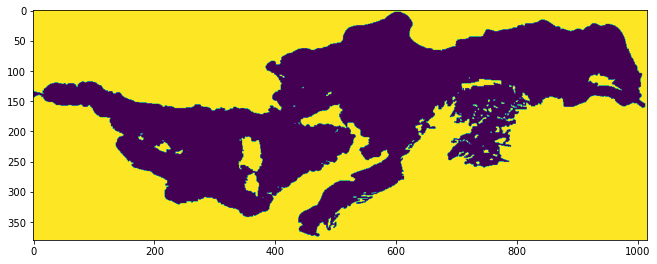

In [94]:
plt.figure(figsize=(11,8))
plt.imshow(landmask['mask_land'])

In [85]:
MPA_field.shape

(380, 1016)

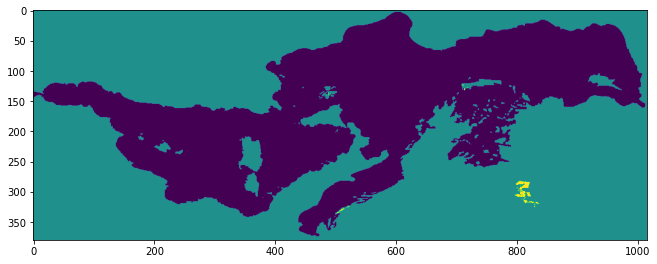

In [97]:
plt.figure(figsize=(11,8))
plt.imshow(MPA_field + landmask['mask_land'])

In [64]:
MPA_field.sum()

621.0